# Project 4 - Group 1

In this project, you are going to explore matrix factorization methods for recommender system. The goal is to match consumers with most appropriate products. Matrix factorization methods characterize both items and users by vectors of factors inferred from item rating patterns. High correspondence between item and user factors leads to a recommendation. Matrix factorization generally has 3 parts:
+ factorization algorithm

+ regularization

+ postpocessing

Our group's project aims to compare 
+ A1+P2
+ A1+P2+R1+R2
+ A1+P2+R3
That is, to compare effect of regularizations given (A1+P2)

## Step 1 Load Data and Train-test Split

In [94]:
import os
import pandas as pd
import numpy as np
os.chdir('/Users/nicholeyao/Downloads/fall2019-project4-sec1-grp1-master 4/lib')

In [95]:
data = pd.read_csv('../data/ml-latest-small/ratings.csv')
few_comments_idx = data['movieId'].value_counts()<5
few_comments_idx = few_comments_idx.index

test_data = data[(data['movieId'].isin(few_comments_idx))].sample(frac = .2)
train_data = data.drop(test_data.index)
train_data.shape[0],test_data.shape[0]

(80669, 20167)

## Step 2 Matrix Factorization

### Step 2.1 Algorithm and Regularization

In [96]:
import time
from Matrix_Factorization_A1 import Matrix_Factorization as mf

### Basic Model: A1+ P2

In [89]:
start = time.time()
model = mf(data, train_data,test_data)
model.gradesc(f = 10,lam = 0, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
est_rating = model.KNN(k=1,test_point=data)
finish = time.time()
print('traing time: {:.2f}s'.format(finish - start))
model.predict(train_data,test_data)
finish_predict = time.time()
print('predict time: {:.2f}s'.format(finish_predict - finish))

traing time: 61.22s
training RMSE: 1.1655072472587162
test RMSE: 1.3625191283746514
predict time: 1.04s


### A1+ R1+ R2 + P2

In [106]:
start = time.time()
model_bias = mf(data, train_data,test_data)
model_bias.gradesc_bias(f = 10,lam = 0.001, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
est_rating = model_bias.KNN(k=1,test_point=data)
finish = time.time()
print('traing time: {:.2f}s'.format(finish - start))
model_bias.predict(train_data,test_data)
finish_predict = time.time()
print('predict time: {:.2f}s'.format(finish_predict - finish))

traing time: 43.66s
training RMSE: 1.2800030718166082
test RMSE: 1.283101264244342
predict time: 1.22s


### A1+ R3 + P2

In [105]:
start = time.time()
model_dy = mf(data, train_data,test_data)
model_dy.gradesc_dynamic(f=10,lam=0.001, lrate=0.01, epoch=10)
est_rating = model_dy.KNN(k=1,test_point=data)
finish = time.time()
print('traing time: {:.2f}s'.format(finish - start))
model_dy.predict(train_data,test_data)
finish_predict = time.time()
print('predict time: {:.2f}s'.format(finish_predict - finish))

TypeError: gradesc_dynamic() got an unexpected keyword argument 'epoch'

### Step 2.2 Parameter Tuning

### 2.2.1：f

##### Basic Model: A1 + P2

In [31]:
result = []
for f in [5,10,15,20,90]:
    model = mf(data, train_data,test_data)
    model.gradesc(f = f,lam = 0, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
    est_rating = model.KNN(k=1,test_point=data)
    result.append(model.predict(train_data,test_data))

training RMSE: 1.0984582783593824
test RMSE: 1.3016001457608517
training RMSE: 1.0426084981463608
test RMSE: 1.2578322157164394
training RMSE: 1.300533933120139
test RMSE: 1.461901053073905
training RMSE: 3.6541551386777122
test RMSE: 3.650276891059406
training RMSE: 3.654237437638881
test RMSE: 3.650334646761977


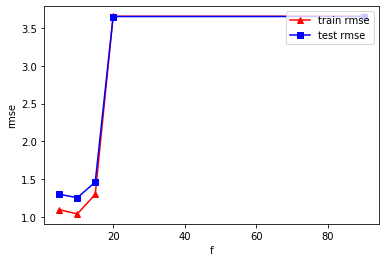

In [34]:
train_rmse_M1 = [result[i][0] for i in range(len(result))]
test_rmse_M1 = [result[i][1] for i in range(len(result))]
np.savetxt('basic_train_rmse_tuning.txt',train_rmse_M1)
np.savetxt('basic_test_rmse_tuning.txt',test_rmse_M1)

plt.plot([5,10,15,20,90], train_rmse_M1, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([5,10,15,20,90], test_rmse_M1, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("f")
plt.ylabel("rmse")

plt.show() 

##### A1 + R1 + R2 + P2:

In [49]:
result = []
for f in [5,10,15,20,90]:
    model_bias = mf(data, train_data,test_data)
    model_bias.gradesc_bias(f = f,lam = 0.001, lrate = 0.01,epoch = 10, stopping_deriv = 0.01)
    est_rating = model_bias.KNN(k=1,test_point=data)
    result.append(model_bias.predict(train_data,test_data))

training RMSE: 1.3223373698631826
test RMSE: 1.3252156736544904
training RMSE: 1.2962208328629423
test RMSE: 1.2980139200522365
training RMSE: 1.2904905942119202
test RMSE: 1.2845556782098815
training RMSE: 1.2975434469893226
test RMSE: 1.3058939290140286
training RMSE: 1.3068941268431356
test RMSE: 1.3122343321219547


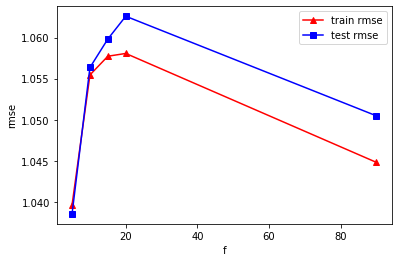

In [45]:
train_rmse_M2_f = [result[i][0] for i in range(len(result))]
test_rmse_M2_f = [result[i][1] for i in range(len(result))]
np.savetxt('bias_train_rmse_tuningf.txt',train_rmse_M2_f)
np.savetxt('bias_test_rmse_tuningf.txt',test_rmse_M2_f)

plt.plot([5,10,15,20,90], train_rmse_M2_f, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([5,10,15,20,90], test_rmse_M2_f, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("f")
plt.ylabel("rmse")

plt.show() 

##### A1 + R3+ P2:

In [ ]:
result = []
for f in [5,10,15,20,90,100]:
    model_dy = mf(data, train_data,test_data)
    model_dy.gradesc_dynamic(f=f,lam=0.001, lrate=0.01, epoch=10)
    est_rating = model_dy.KNN(k=1,test_point=data)
    result.append(model.predict(train_data,test_data))

In [ ]:
train_rmse_M3_f = [result[i][0] for i in range(len(result))]
test_rmse_M3_f = [result[i][1] for i in range(len(result))]
np.savetxt('dynamic_train_rmse_tuningf.txt',train_rmse_M3_f)
np.savetxt('dynamic_test_rmse_tuningf.txt',test_rmse_M3_f)

plt.plot([5,10,15,20,90], train_rmse_M3_f, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([5,10,15,20,90], test_rmse_M3_f, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("f")
plt.ylabel("rmse")

plt.show()

### 2.2.1：lam

##### Basic Model: lam = 0

##### A1 + R1 + R2 + P2:

In [107]:
result = []
for lam in [0.0001, 0.001, 0.03, 0.1, 0.3]:
    model_bias = mf(data, train_data,test_data)
    model_bias.gradesc_bias(f = 10,lam = lam, lrate = 0.01,epoch = 10, stopping_deriv = 0.01)
    est_rating = model_bias.KNN(k=1,test_point=data)
    result.append(model_bias.predict(train_data,test_data))

training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954


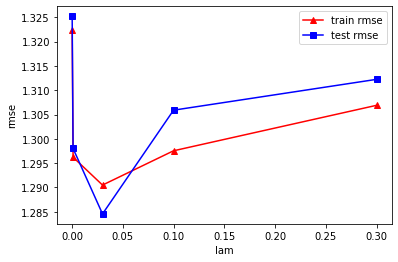

In [50]:
train_rmse_M2_lam = [result[i][0] for i in range(len(result))]
test_rmse_M2_lam = [result[i][1] for i in range(len(result))]
np.savetxt('bias_train_rmse_tuninglam.txt',train_rmse_M2_lam)
np.savetxt('bias_test_rmse_tuninglam.txt',test_rmse_M2_lam)

plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], train_rmse_M2_lam, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], test_rmse_M2_lam, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("lam")
plt.ylabel("rmse")

plt.show() 

##### A1 + R3 + P2:

In [ ]:
result = []
for lam in [0.0001, 0.001, 0.03, 0.1, 0.3]:
    model = mf(data, train_data,test_data)
    model.gradesc_dynamic(f = 10,lam = lam, lrate = 0.01,epoch = 10)
    est_rating = model.KNN(k=1,test_point=data)
    result.append(model.predict(train_data,test_data))

In [ ]:
train_rmse_M3_lam = [result[i][0] for i in range(len(result))]
test_rmse_M3_lam = [result[i][1] for i in range(len(result))]
np.savetxt('dynamic_train_rmse_tuninglam.txt',train_rmse_M3_lam)
np.savetxt('dynamic_test_rmse_tuninglam.txt',test_rmse_M3_lam)

plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], train_rmse_M3_lam, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], test_rmse_M3_lam, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("lam")
plt.ylabel("rmse")

plt.show()

## Step 4 Evaluation